<a href="https://colab.research.google.com/github/ronnyboi/Data_Analytics/blob/main/Data%20Preprocessing%20on%20IPL%20Dataset/Ron_PreprocessingProgram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing on IPL Dataset


1. Create a pandas data frame and describe the data set 
2. Visualize any two columns
3. Preprocess the data

In [ ]:
import pandas as pd 
df = pd.read_csv('IPL_most_runs_average_strikerate.csv',  encoding='utf-8')
df.head(10)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,batsman,total_runs,out,numberofballs,average,strikerate
0,V Kohli,5426,152,4111,35.697368,131.987351
1,SK Raina,5386,160,3916,33.662500,137.538304
2,RG Sharma,4902,161,3742,30.447205,130.999466
3,DA Warner,4717,114,3292,41.377193,143.286756
4,S Dhawan,4601,137,3665,33.583942,125.538881
5,CH Gayle,4525,110,2972,41.136364,152.254374
6,MS Dhoni,4450,118,3206,37.711864,138.802246
7,RV Uthappa,4420,156,3381,28.333333,130.730553
8,AB de Villiers,4414,104,2902,42.442308,152.101999
9,G Gambhir,4219,134,3400,31.485075,124.088235


In [ ]:
df.describe()

,total_runs,out,numberofballs,average,strikerate
count,516.000000,516.000000,516.000000,482.000000,516.000000
mean,430.625969,17.063953,335.645349,16.355074,105.433442
std,882.275431,28.124511,663.593679,11.146222,39.633938
min,0.000000,0.000000,1.000000,0.000000,0.000000
25%,15.000000,2.000000,17.000000,8.000000,84.362069
50%,74.000000,5.500000,68.000000,14.607143,111.651584
75%,340.500000,18.000000,290.000000,23.657609,130.499036
max,5426.000000,161.000000,4111.000000,88.000000,250.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516 entries, 0 to 515
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   batsman        516 non-null    object 
 1   total_runs     516 non-null    int64  
 2   out            516 non-null    int64  
 3   numberofballs  516 non-null    int64  
 4   average        482 non-null    float64
 5   strikerate     516 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 24.3+ KB


In [ ]:
df.isnull()

,batsman,total_runs,out,numberofballs,average,strikerate
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
511,False,False,False,False,False,False
512,False,False,False,False,False,False
513,False,False,False,False,False,False
514,False,False,False,False,False,False


# Data Visualization

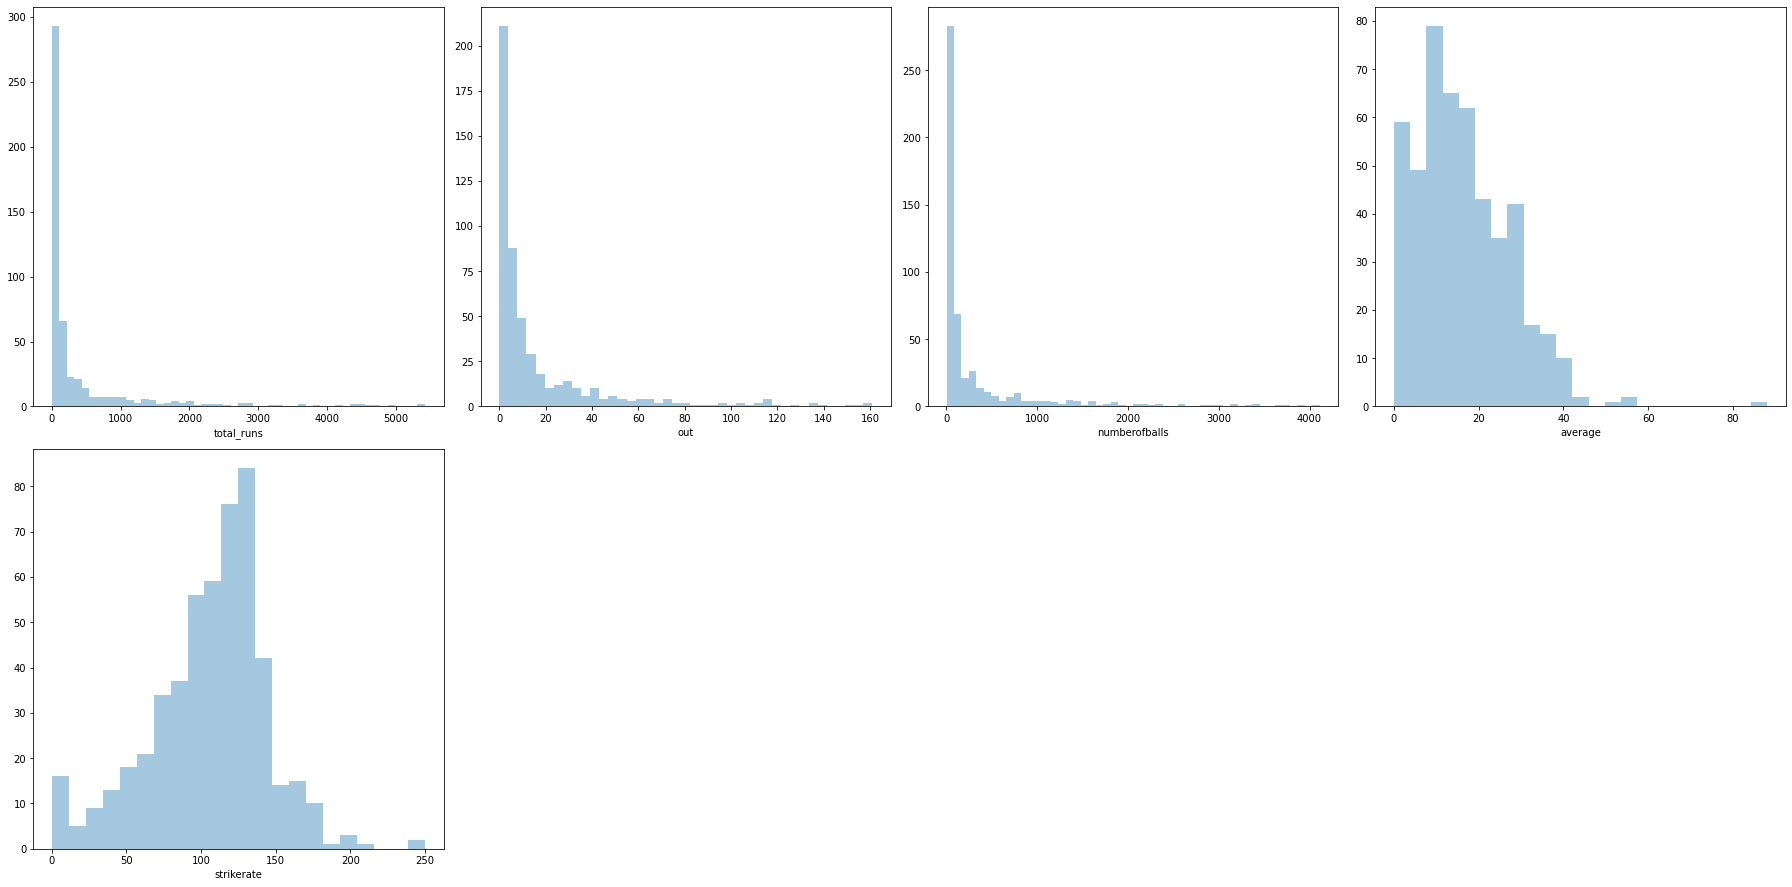

In [ ]:
num_attributes = df.select_dtypes(exclude='object').copy()
fig = plt.figure(figsize=(25,55))
for i in range(len(num_attributes.columns)):
    fig.add_subplot(9,4,i+1)
    sns.distplot(num_attributes.iloc[:,i].dropna(),kde=False)
    plt.xlabel(num_attributes.columns[i])

plt.tight_layout()
plt.show()

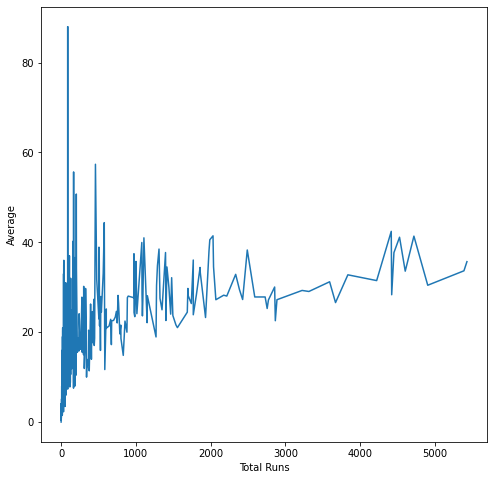

In [ ]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(8, 8))
plt.ylabel('Average')
plt.xlabel('Total Runs')
plt.plot(yt_df['total_runs'],yt_df['average'])
plt.show()

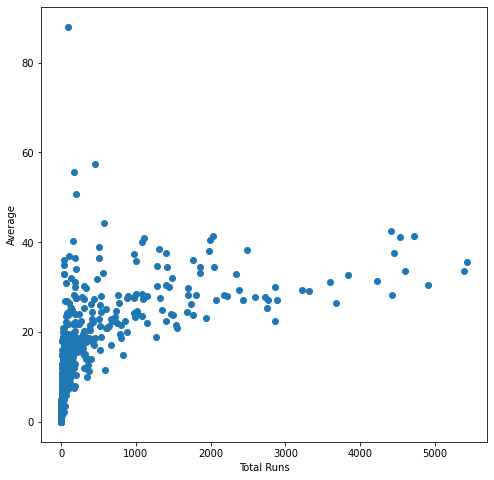

In [ ]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(8, 8))
plt.ylabel('Average')
plt.xlabel('Total Runs')
plt.scatter(yt_df['total_runs'],yt_df['average'])
plt.show()

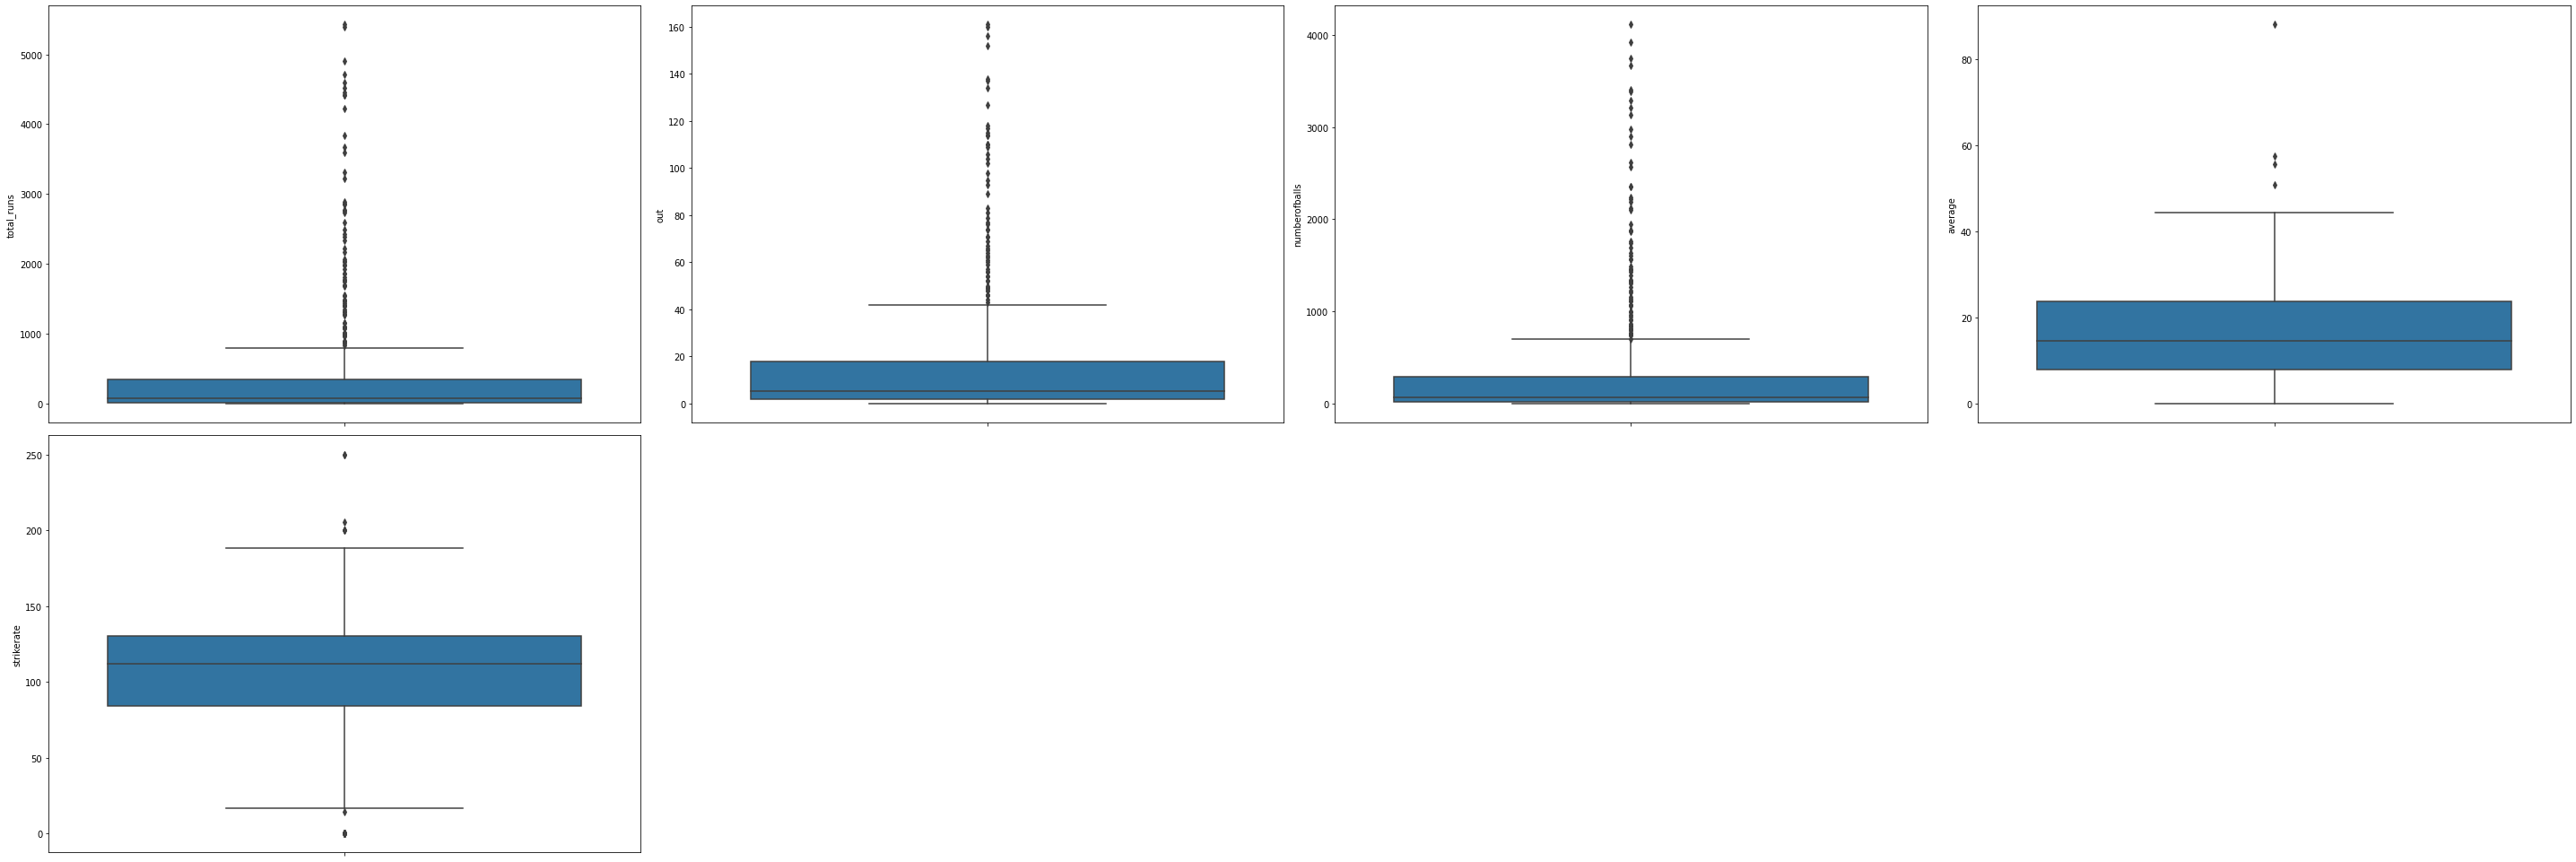

In [ ]:
fig = plt.figure(figsize=(40, 60))

for i in range(len(num_attributes.columns)):
    fig.add_subplot(9, 4, i+1)
    sns.boxplot(y=num_attributes.iloc[:,i])

plt.tight_layout()
plt.show()

## Label Encoder

In [ ]:

from sklearn import preprocessing 
  
label_encoder = preprocessing.LabelEncoder() 
df['total_runs']= label_encoder.fit_transform(df['total_runs'])
df['average']= label_encoder.fit_transform(df['average'])
df['strikerate']= label_encoder.fit_transform(df['strikerate'])
df.head()

,batsman,total_runs,out,numberofballs,average,strikerate
0,V Kohli,282,152,4111,296,300
1,SK Raina,281,160,3916,289,330
2,RG Sharma,280,161,3742,275,295
3,DA Warner,279,114,3292,315,354
4,S Dhawan,278,137,3665,288,252


# Dropping Columns

In [ ]:
df=df.drop(['batsman'], axis = 1) 
df.head()

,total_runs,out,numberofballs,average,strikerate
0,282,152,4111,296,300
1,281,160,3916,289,330
2,280,161,3742,275,295
3,279,114,3292,315,354
4,278,137,3665,288,252


# Data Preprocessing

**Treating outliers**

Assymetric Mean Filter

In [ ]:
t_list = list(df['total_runs'])
filtered_t_list=[None]*len(t_list)

In [ ]:
q=3
for i in range(q-1):
  filtered_t_list[i] = t_list[i]

#applying filter on rest of the values
for i in range(q-1, len(t_list)):
  start_i = (i+1)-q
  end_i = i+1
  filtered_t_list[i] = sum(t_list[ start_i:end_i ])/3.0
  
filtered_t_list[:10]

[5426,
 5386,
 5238.0,
 5001.666666666667,
 4740.0,
 4614.333333333333,
 4525.333333333333,
 4465.0,
 4428.0,
 4351.0]

Z Score

In [ ]:
import numpy as np
from scipy import stats
zscore = np.abs(stats.zscore(df))
print(zscore)

[[2.22657819 4.80246528 5.69477737 1.4471581  0.96360411]
 [2.21493159 5.08719069 5.40063769 1.38120639 1.20733927]
 [2.20328498 5.12278137 5.1381746  1.24930296 0.92298159]
 ...
 [1.05776458 0.53613631 0.49271465 1.34165727 1.47374746]
 [1.05776458 0.57172698 0.50478192 1.34165727 1.47374746]
 [1.05776458 0.57172698 0.50478192 1.34165727 1.47374746]]


In [ ]:
thres = 3
print(np.where(zscore > 3))

(array([ 0,  0,  1,  1,  2,  2,  3,  3,  4,  4,  5,  5,  6,  6,  7,  7,  8,
        8,  9,  9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 15, 16, 16, 17, 18,
       19]), array([1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1]))


In [ ]:
print(zscore[12][3])

1.2775679794364232


In [ ]:
Q1 = np.percentile(df, 25, interpolation = 'midpoint')  
Q2 = np.percentile(df, 50, interpolation = 'midpoint')  
Q3 = np.percentile(df, 75, interpolation = 'midpoint')
IQR=Q3-Q1 
print(IQR)

181.0


In [ ]:
low_limit = Q1 - 1.5 * IQR 
upper_limit = Q3 + 1.5 * IQR 
low_limit

-259.5

In [ ]:
upper_limit

464.5

In [ ]:
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_out.shape
y=df.columns.values.reshape(-1,5)

In [ ]:
df.head(10)

,total_runs,out,numberofballs,average,strikerate
0,282,152,4111,296,300
1,281,160,3916,289,330
2,280,161,3742,275,295
3,279,114,3292,315,354
4,278,137,3665,288,252
5,277,110,2972,314,372
6,276,118,3206,304,340
7,275,156,3381,261,291
8,274,104,2902,317,371
9,273,134,3400,279,242


 **Applying Min Max Normalization**

In [ ]:
import numpy as np
def minMax(df,col):
    print((df[col]-np.min(df[col]))/(np.max(df[col])-np.min(df[col])))

In [ ]:
minMax(df,'total_runs')

0      1.000000
1      0.996454
2      0.992908
3      0.989362
4      0.985816
         ...   
511    0.000000
512    0.000000
513    0.000000
514    0.000000
515    0.000000
Name: total_runs, Length: 516, dtype: float64


In [ ]:
minMax(df,'out')

0      0.944099
1      0.993789
2      1.000000
3      0.708075
4      0.850932
         ...   
511    0.006211
512    0.006211
513    0.012422
514    0.006211
515    0.006211
Name: out, Length: 516, dtype: float64


In [ ]:
minMax(df,'numberofballs')

0      1.000000
1      0.952555
2      0.910219
3      0.800730
4      0.891484
         ...   
511    0.002920
512    0.000000
513    0.001946
514    0.000000
515    0.000000
Name: numberofballs, Length: 516, dtype: float64


In [ ]:
minMax(df,'average')

0      0.831461
1      0.811798
2      0.772472
3      0.884831
4      0.808989
         ...   
511    0.000000
512    0.000000
513    0.000000
514    0.000000
515    0.000000
Name: average, Length: 516, dtype: float64


In [ ]:
minMax(df,'strikerate')

0      0.742574
1      0.816832
2      0.730198
3      0.876238
4      0.623762
         ...   
511    0.000000
512    0.000000
513    0.000000
514    0.000000
515    0.000000
Name: strikerate, Length: 516, dtype: float64
